In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Datasets/telco_train.csv")
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [5]:
df = df.drop(['Churn Category', 'Churn Reason', 'Churn Score','Customer Status','Lat Long','Customer ID','Latitude', 'Longitude','Quarter', 'Country','City','State'],axis=1)

In [6]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'CLTV', 'Contract', 'Dependents', 'Device Protection Plan', 'Gender',
       'Internet Service', 'Internet Type', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score',
       'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code', 'Churn'],
      dtype='object')

In [15]:
X = df.drop(['Churn'],axis=1)

In [16]:
y = df['Churn']

In [17]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # for scikit-learn < 1.2
encoded_data = encoder.fit_transform(X[categorical_cols])

In [19]:
encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=X.index)

X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Logistic": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name}: {acc:.2f}")
    except Exception as e:
        print(f"{name} failed: {e}")


c:\Users\saza\.conda\envs\langchain\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic: 0.79
RandomForest: 0.96
GradientBoosting: 0.96
XGBoost: 0.96
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 887, number of negative: 2493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2415
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262426 -> initscore=-1.033397
[LightGBM] [Info] Start training from score -1.033397
LightGBM: 0.96
SVM: 0.72
KNN: 0.69
NaiveBayes: 0.79
MLP: 0.72


In [23]:
model = XGBClassifier(    max_depth=4,        # reduce complexity
    n_estimators=70,   # lower tree count
    learning_rate=0.1,  # smaller steps
    subsample=0.8,      # use 80% rows
    colsample_bytree=0.8,  # use 80% features
    reg_alpha=1,        # L1 regularization
    reg_lambda=1,       # L2 regularization
    eval_metric='logloss')


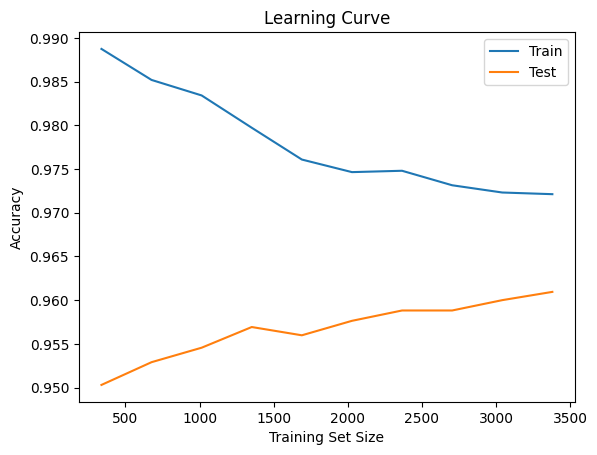

In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [25]:
import pickle

# Train your model
model.fit(X, y)

# Save model
with open("churn_value.pkl", "wb") as f:
    pickle.dump(model, f)
with open("churn_value_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
with open("churn_value_categorical_columns.pkl", "wb") as f:
    pickle.dump(categorical_cols, f)
